You've seen the matplotlib examples in class. Explore the library and create your at least 3 plot of personal data. Personal data can be the abstract or literal. Here are some examples: 

* collections of plants you own 
* food you ate during the day 
* kinds of exercises and how often you do them 
* emotions over time during a day 
* your coin collection 
* stuff that is in your fridge 
* your list of most frequent restaurants and cuisine 

See 2 examples below of my nail polish collection! 
Documentation: https://matplotlib.org/


i dont have any interesting personal data i want o track, but i am big fan of the anime chibi maruko-chan, so i scrap, format, translate the title of all the eps in the first season

In [51]:


#scraping wiki


from bs4 import BeautifulSoup
import requests
import csv
from googletrans import Translator

source = requests.get('https://en.wikipedia.org/wiki/List_of_Chibi_Maruko-chan_episodes#Series_1_(1990%E2%80%931992)').text
soup = BeautifulSoup(source,'lxml')

csv_file = open('maruko.csv','w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['number','name','date'])


for table in soup.find_all('tr',class_='vevent'):

    name = table.td.text
    number = table.th.text
    
    print (number)
    print(name)
    dates = table.find_all('td')
    date = dates[1]
    span = date.find('span')
    span.extract()
    del date.attrs['style']
    print(date.text)
    print('\n')

    csv_writer.writerow([number,name,date])
    
csv_file.close()





1
"Maru-chan's Sibling Rivalry!" (Japanese: 「まるちゃんきょうだいげんかをする」の巻)"Maru-chan's in the New Year Mood!" (Japanese: 「まるちゃんはまだおとそ気分」の巻)
January 7, 1990


2
"Here Comes the Tutor!" (Japanese: 「家庭教師がやってきた」の巻)"Maru-chan buys an Alarm Clock!" (Japanese: 「まるちゃん目覚まし時計を買う」の巻)
January 14, 1990


3
"Today is Sensei's Home Visit!" (Japanese: 「今日は家庭訪問」の巻)"Let's Meet the Pretentious Kid!" (Japanese: 「生き物係のキザ野郎参上」の巻)
January 21, 1990


4
"Maru-Chan Learns to Ride a Bike" (Japanese: 「まるちゃん自転車の練習をする」の巻)
January 28, 1990


5
"Maru-Chan Gets a Certificate" (Japanese: 「まるちゃん賞状をもらう」の巻)"Maru-Chan Catches a Cold" (Japanese: 「まるちゃんカゼをひく」の巻)
February 4, 1990


6
"Maru-Chan And Friends Find a Puppy" (Japanese: 「まるちゃんたち犬をひろう」の巻)
February 11, 1990


7
"My Family Eats French Cuisine" (Japanese: 「みんなでフランス料理を食べに行く」の巻)"Maru-Chan Hates Marathons" (Japanese: 「まるちゃんはマラソンがイヤ」の巻)
February 18, 1990


8
"The Valentine's Day of Sadness" (Japanese: 「悲しきバレンタインデー」の巻)"Hanawa Enters a Singing Contest" (Japanese: 「花輪君子供歌合戦に出場する」の巻)
F

IndexError: list index out of range

In [188]:
#clear the scrap into jap


import csv
import re


input_file = 'maruko.csv'
output_file = 'output.csv'

with open(input_file, 'r', encoding='utf-8') as csv_in_file, open(output_file, 'w', encoding='utf-8', newline='') as csv_out_file:
    
    csv_reader = csv.reader(csv_in_file)
    csv_writer = csv.writer(csv_out_file)
    next(csv_reader)
    for row in csv_reader:

        # Strip the second column of any English...
        second_column = re.sub(r'[a-zA-Z":!()\'-^\s+]', '', row[1])

        # Strip the third column of any <td></td>...
        third_column = re.sub(r'[<>td/]', '', row[2])

        
        csv_writer.writerow([row[0], second_column, third_column])


In [199]:
#tranlate japanese into eng


import csv
import requests
import uuid
import re

# Define the API key, endpoint, and location
key = "a937c4dd05b44f98ad2dc114ccb196f0"
endpoint = "https://api.cognitive.microsofttranslator.com/"
location = "eastus"

# Define the headers for the API request
headers = {
    'Ocp-Apim-Subscription-Key': key,
    'Ocp-Apim-Subscription-Region': location,
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
}

# Define the translation parameters
params = {
    'api-version': '3.0',
    'from': 'ja',
    'to': ['en']
}

# Define the path to the input and output CSV files
input_file = 'output.csv'
output_file = 'maruko_translated.csv'

# Open the input CSV file for reading and the output CSV file for writing
with open(input_file, 'r', encoding='utf-8') as csv_in_file, open(output_file, 'w', encoding='utf-8', newline='') as csv_out_file:

    
    csv_reader = csv.reader(csv_in_file)
    csv_writer = csv.writer(csv_out_file)


    for row in csv_reader:

        if re.search(r'[\u3040-\u309F\u30A0-\u30FF\u3400-\u4DBF\u4E00-\u9FFF]', row[1]):
            body = [{'text': row[1]}]
            response = requests.post(endpoint + '/translate', params=params, headers=headers, json=body)
            translated_text = response.json()[0]['translations'][0]['text']

            # Write 
            csv_writer.writerow([row[0],translated_text,row[2]])

        else:

            # If the row does not have any Japanese text
            print('nonono')



added new column based on my insterest level of each ep's title

In [269]:
#reead the new csv with panda

import pandas as pd
import numpy as np

In [300]:
df = pd.read_csv('marukooo.csv', dtype=object)
df

,Unnamed: 0,name,date,interests level
0,1,"The volume of ""Maru-chan Kyodai Genka"" ""Maru-c...","January 7, 1990",7
1,2,"The volume of ""The Tutor Has Come"" ""Buy Maru-c...","January 14, 1990",4
2,3,"The volume of ""Home Visiting Today"" ""Kiza bast...","January 21, 1990",10
3,4,"Volume of ""Practicing Maru-chan Bicycle""","January 28, 1990",10
4,5,"The volume of ""Getting a Maru-chan Award Certi...","February 4, 1990",10
5,6,"""Maru-chan and the Dog Hiro"" volume","February 11, 1990",10
6,7,"""Everyone Goes to Eat French Food"" Volume ""Mar...","February 18, 1990",10
7,8,"""Sad Valentine's Day"" volume ""Hanawa-kun parti...","February 25, 1990",10
8,9,"""Practicing the Maru-chan Flute"" volume ""I wan...","March 4, 1990",8
9,10,"""Maru-chan Goes to Shinseki's House Far Away"" ...","March 11, 1990",7


In [485]:
love_df = df[(df['interests level'] == 1)]
love_df.shape
love_df

,Unnamed: 0,name,date,interests level
33,34,"The volume of ""Child-chan who accumulates home...","Augus 26, 1990",1


In [339]:
love_df = df[(df['interests level'] == 2)]
love_df.shape

(8, 4)

In [326]:
love_df = df[(df['interests level'] == 3)]
love_df.shape

(8, 4)

In [337]:
love_df = df[(df['interests level'] == 4)]
love_df.shape

(13, 4)

In [328]:
love_df = df[(df['interests level'] == 5)]
love_df.shape

(13, 4)

In [329]:
love_df = df[(df['interests level'] == 6)]
love_df.shape

(8, 4)

In [330]:
love_df = df[(df['interests level'] == 7)]
love_df.shape

(15, 4)

In [331]:
love_df = df[(df['interests level'] == 8)]
love_df.shape

(26, 4)

In [486]:
love_df = df[(df['interests level'] == 9)]
love_df.shape
love_df

,Unnamed: 0,name,date,interests level
50,51,"""Participate in the Maru-chan Christmas Party""...","December 23, 1990",9
51,52,"""New Year's Eve Maruko-chan"" volume","December 30, 1990",9
52,53,"Volume of ""Usual New Year's""","January 6, 1991",9
70,71,"The first part of the volume of ""Grandpa Belt ...","May 12, 1991",9
71,72,"The second part of ""Grandpa Belt Quiz""","May 19, 1991",9
78,79,"""Maru-chan's Tanabata Film Party"" volume ""How ...","July 7, 1991",9
81,82,"The volume of ""Maru-chan Goes to Sleepover""","Augus 4, 1991",9
82,83,"""I can't help but hate Maru-chan radio gymnast...","Augus 11, 1991",9
83,84,"""I envy the Maruko twins"" volume","Augus 18, 1991",9
84,85,"Volume of ""Cleaning the Maruko Shrine"" ""Forget...","Augus 25, 1991",9


In [333]:
love_df = df[(df['interests level'] == 10)]
love_df.shape

(30, 4)

In [437]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

love={
    '(>.<)': 1, 
    '(-.-)': 8, 
    '(.3.)': 8, 
    '(-0-)': 13, 
    '(o-o)': 13, 
    '(^-^)': 8,
    '(*0*)': 15,
    '(*3*)':26,
    '(^3^)':20,
    '(♡3♡)':30  
}

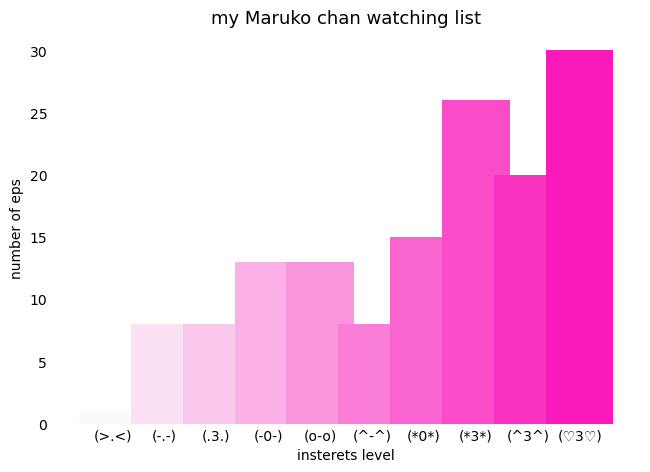

In [489]:
fig, ax = plt.subplots(figsize=(6, 4))

hue = 0.88
value = 0.98
# colors=['#ffe6f8','#ffc7ef','#fcaee6','#ff94e1','#ff80db','#fa66d0','#ff4fcd','#ff3dc8','#ff29c2','#fa07b5']
colors=[mcolors.hsv_to_rgb((hue, i/10, value)) for i in range(10)]

plt.bar(range(len(love)), list(love.values()), align='center',width=1.3, color=colors)
plt.xticks(range(len(love)), list(love.keys()), rotation = 0,fontsize=10)
ax.grid(False)
ax.set_xlabel('insterets level', fontsize=10)
ax.set_ylabel('number of eps', fontsize=10,rotation=90)
ax.set_title('my Maruko chan watching list', fontsize=13)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

spend too much time on none relevant data collecting, now i out of time...